Batch Gradient Descent:
Final cost: 1.1947898109836577e-06
Final theta: [0.99664085 0.00133765]

Stochastic Gradient Descent:
Final cost: 1.1968264274546284e-06
Final theta: [0.99664085 0.00133765]

Mini-Batch Gradient Descent:
Final cost: 1.1950083270376282e-06
Final theta: [0.99664085 0.00133765]



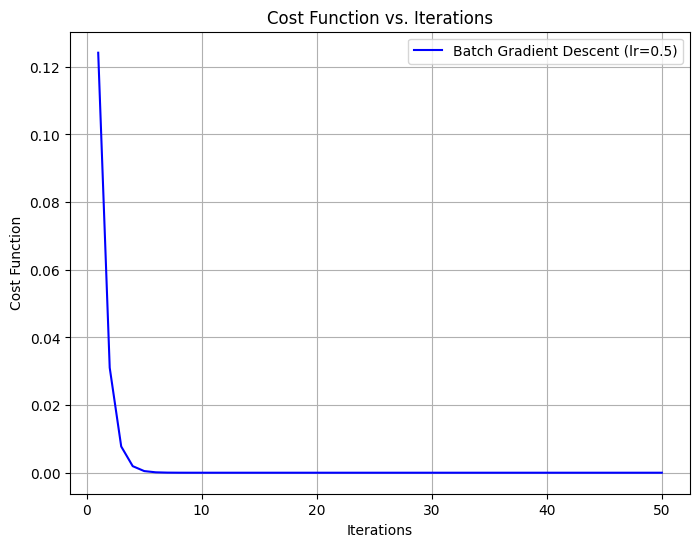

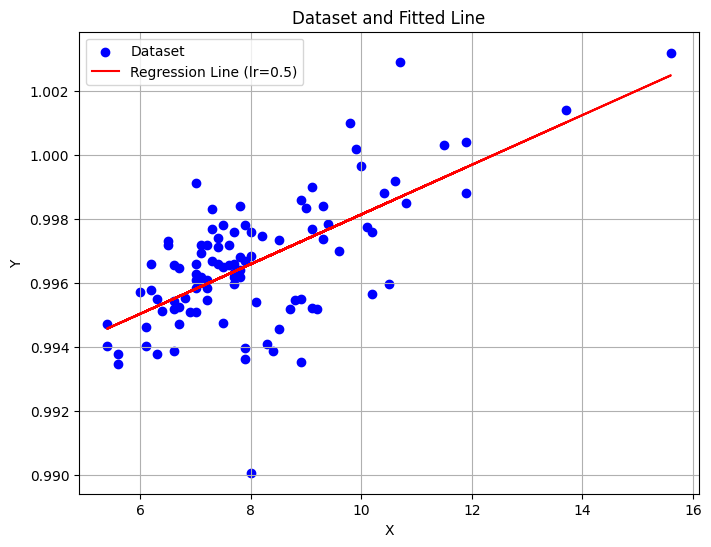

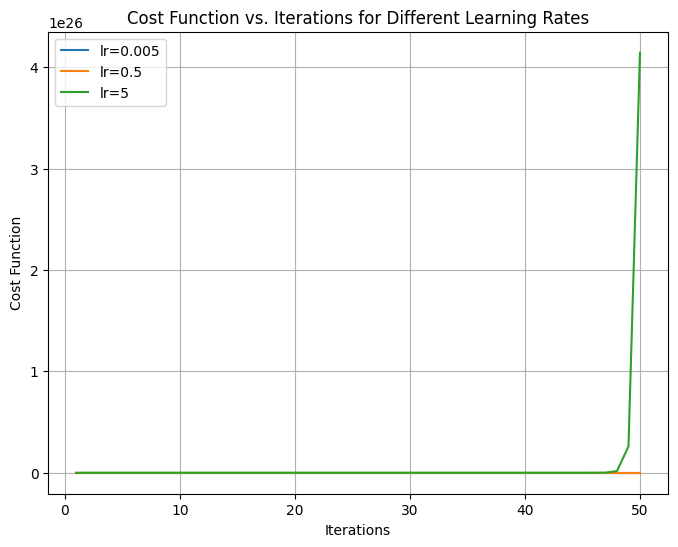

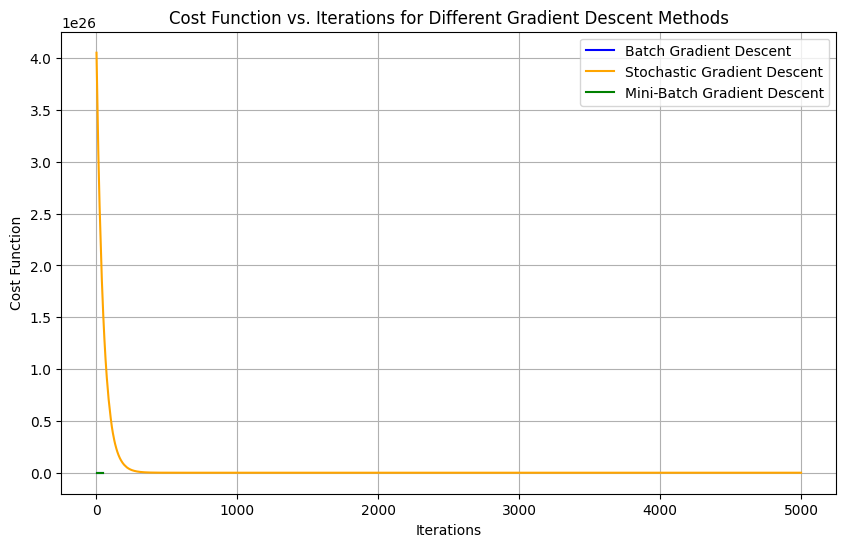

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
X = np.loadtxt("C:/Users/samar/OneDrive/Desktop/linearX.csv", delimiter=',')
Y = np.loadtxt("C:/Users/samar/OneDrive/Desktop/linearY.csv", delimiter=',')

# Normalize the independent variable
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std

def compute_cost(X, Y, theta):
    """Compute the cost function for linear regression."""
    m = len(Y)
    predictions = X @ theta
    errors = predictions - Y
    return (1 / (2 * m)) * np.sum(errors**2)

def gradient_descent(X, Y, theta, alpha, num_iters):
    """Perform batch gradient descent."""
    m = len(Y)
    cost_history = []
    for _ in range(num_iters):
        predictions = X @ theta
        errors = predictions - Y
        theta -= (alpha / m) * (X.T @ errors)
        cost_history.append(compute_cost(X, Y, theta))
    return theta, cost_history

def stochastic_gradient_descent(X, Y, theta, alpha, num_iters):
    """Perform stochastic gradient descent."""
    m = len(Y)
    cost_history = []
    for _ in range(num_iters):
        for i in range(m):
            xi = X[i, :].reshape(1, -1)
            yi = Y[i]
            prediction = xi @ theta
            error = prediction - yi
            theta -= alpha * (xi.T @ error)
            cost_history.append(compute_cost(X, Y, theta))
    return theta, cost_history

def mini_batch_gradient_descent(X, Y, theta, alpha, num_iters, batch_size):
    """Perform mini-batch gradient descent."""
    m = len(Y)
    cost_history = []
    for _ in range(num_iters):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size]
            predictions = X_batch @ theta
            errors = predictions - Y_batch
            theta -= (alpha / len(Y_batch)) * (X_batch.T @ errors)
        cost_history.append(compute_cost(X, Y, theta))
    return theta, cost_history

# Prepare data for linear regression
m = len(Y)
X_design = np.c_[np.ones(m), X_norm]
theta_initial = np.zeros(2)
num_iters = 50

#Batch Gradient Descent with Learning Rate 0.5
alpha = 0.5
theta_final, cost_history = gradient_descent(X_design, Y, theta_initial, alpha, num_iters)
theta_final_sgd, cost_history_sgd = stochastic_gradient_descent(X_design, Y, theta_initial, alpha=0.01, num_iters=50)
theta_final_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X_design, Y, theta_initial, alpha=0.1, num_iters=50, batch_size=10)

# After Batch Gradient Descent
print("Batch Gradient Descent:")
print(f"Final cost: {cost_history[-1]}")
print(f"Final theta: {theta_final}\n")

# After Stochastic Gradient Descent
print("Stochastic Gradient Descent:")
print(f"Final cost: {cost_history_sgd[-1]}")
print(f"Final theta: {theta_final_sgd}\n")

# After Mini-Batch Gradient Descent
print("Mini-Batch Gradient Descent:")
print(f"Final cost: {cost_history_mbgd[-1]}")
print(f"Final theta: {theta_final_mbgd}\n")


# Plot cost function vs. iterations for batch gradient descent
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iters + 1), cost_history, label="Batch Gradient Descent (lr=0.5)", color="blue")
plt.title("Cost Function vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.legend()
plt.grid()
plt.show()

# Plot dataset and regression line
regression_line = X_design @ theta_final
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="Dataset", color="blue")
plt.plot(X, regression_line, label=f"Regression Line (lr=0.5)", color="red")
plt.title("Dataset and Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

#Test with Different Learning Rates
learning_rates = [0.005, 0.5, 5]
plt.figure(figsize=(8, 6))
for lr in learning_rates:
    _, cost_hist = gradient_descent(X_design, Y, theta_initial, lr, num_iters)
    plt.plot(range(1, num_iters + 1), cost_hist, label=f"lr={lr}")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.legend()
plt.grid()
plt.show()

#Stochastic and Mini-Batch Gradient Descent
theta_final_sgd, cost_history_sgd = stochastic_gradient_descent(X_design, Y, theta_initial, alpha=0.01, num_iters=50)
theta_final_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X_design, Y, theta_initial, alpha=0.1, num_iters=50, batch_size=10)

# Plot comparisons
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, label="Batch Gradient Descent", color="blue")
plt.plot(range(1, len(cost_history_sgd) + 1), cost_history_sgd, label="Stochastic Gradient Descent", color="orange")
plt.plot(range(1, len(cost_history_mbgd) + 1), cost_history_mbgd, label="Mini-Batch Gradient Descent", color="green")
plt.title("Cost Function vs. Iterations for Different Gradient Descent Methods")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.legend()
plt.grid()
plt.show()
